# __Linear Regression on Agricultural Dataset__

In [ ]:
# Initilise the drive for dataset
from google.colab import drive

# initilise tyhe path
drive.mount('/content/drive')

# Setting Address
import os
os.chdir('/content/drive/My Drive/Crop Prediction Project') # for fetching the data we require the path

Mounted at /content/drive


In [ ]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
# Loading the Dataset using pandas package
df_crop_production = pd.read_csv("crop_production.csv")
df_crop_production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.000000,2000.000000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.000000,1.000000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.000000,321.000000
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.000000,641.000000
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.000000,165.000000


## **1. Data Overview**


In [ ]:
# Check the shape of the data
df_crop_production.shape

(246091, 7)

In [ ]:
# Check the column names
df_crop_production.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
# Check the datatypes
df_crop_production.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [ ]:
# Check the perticulate data
df_crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
# Describe the each column
df_crop_production.describe(include = "all")

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
count,246091,246091,246091.000000,246091,246091,246091.000000,242361.000000
unique,33,646,NaN,6,124,NaN,NaN
top,Uttar Pradesh,BIJAPUR,NaN,Kharif,Rice,NaN,NaN
freq,33306,945,NaN,95951,15104,NaN,NaN
mean,NaN,NaN,2005.643018,NaN,NaN,12002.820864,582503.442251
std,NaN,NaN,4.952164,NaN,NaN,50523.404019,17065813.172410
min,NaN,NaN,1997.000000,NaN,NaN,0.040000,0.000000
25%,NaN,NaN,2002.000000,NaN,NaN,80.000000,88.000000
50%,NaN,NaN,2006.000000,NaN,NaN,582.000000,729.000000
75%,NaN,NaN,2010.000000,NaN,NaN,4392.000000,7023.000000


In [ ]:
# Describe the each column
df_crop_production.describe()

,Crop_Year,Area,Production
count,246091.000000,246091.000000,242361.000000
mean,2005.643018,12002.820864,582503.442251
std,4.952164,50523.404019,17065813.172410
min,1997.000000,0.040000,0.000000
25%,2002.000000,80.000000,88.000000
50%,2006.000000,582.000000,729.000000
75%,2010.000000,4392.000000,7023.000000
max,2015.000000,8580100.000000,1250800000.000000


# Interpretation

1.   We have `7` Attributs and `246091` observations in the Data.
2.   Those columns are like 'State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production'.
3.   In the data we have 4 Catagorical and remaining are Numirical columns.
4.   Only `Production` column contain the null values.
5.   `Crop_Year` this column needs to be catagorical.
6.   Huge outliers are present in `Area` and `Production` column (Check the difference between mean and 50th percent).


In [ ]:
# Action
# We need to do the type casting for year column
df_crop_production.Crop_Year = df_crop_production.Crop_Year.astype('object')
# Check the datatypes
df_crop_production.dtypes

State_Name        object
District_Name     object
Crop_Year         object
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

## **2. Data Preprecessing**

In [ ]:
# Show  the first 5 rows
df_crop_production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.000000,2000.000000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.000000,1.000000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.000000,321.000000
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.000000,641.000000
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.000000,165.000000


### a. Catagorical Data

In [ ]:
# First Check Catagorical Columns
df_cat = df_crop_production.select_dtypes(include=[np.object])
df_cat.head()

,State_Name,District_Name,Crop_Year,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut


In [ ]:
# State Name
df_cat.State_Name.value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

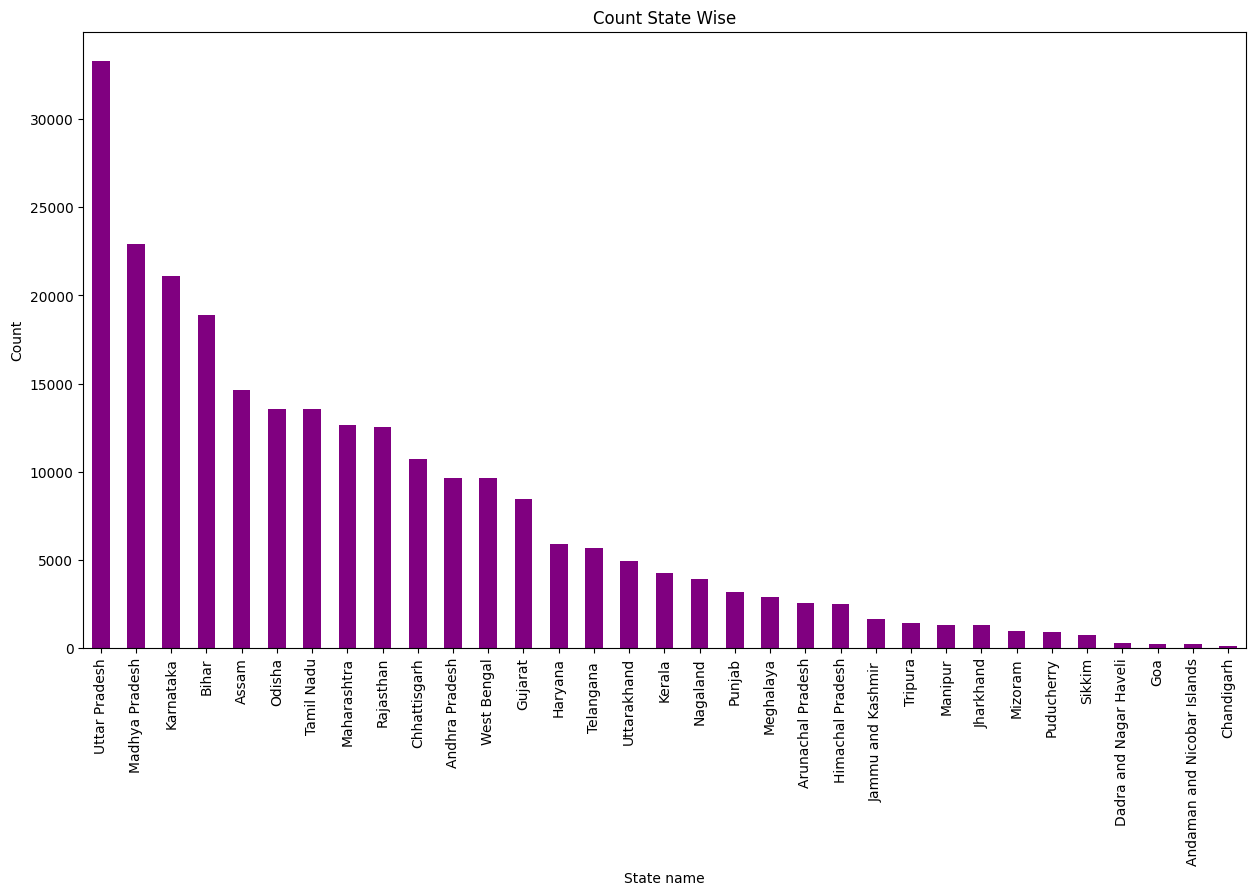

In [ ]:
# State Name
# Plot the count of each state
# We used matplotlib 
# value coun calculates the count of each catagory
# Kind is praposed which plot we need to plot
# color is plot the color in graph
df_cat.State_Name.value_counts().plot(kind = "bar", color = "purple")

# Label the X axis
plt.xlabel("State name")

# Label the Y axis
plt.ylabel("Count")

# Give Title
plt.title("Count State Wise")

# To draw the full graph we use plt.show()
plt.show()

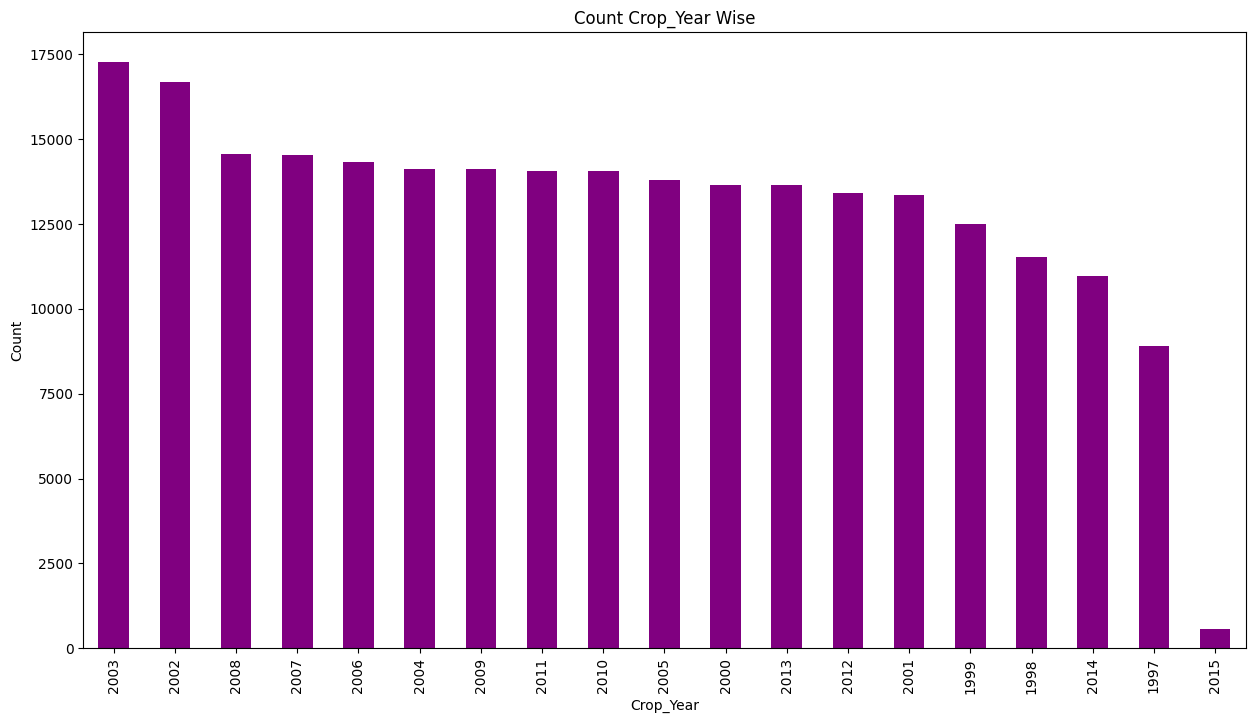

In [ ]:
# Crop_Year
# Plot the count of each state
# We used matplotlib 
# value coun calculates the count of each catagory
# Kind is praposed which plot we need to plot
# color is plot the color in graph
df_cat.Crop_Year.value_counts().plot(kind = "bar", color = "purple")

# Label the X axis
plt.xlabel("Crop_Year")

# Label the Y axis
plt.ylabel("Count")

# Give Title
plt.title("Count Crop_Year Wise")

# To draw the full graph we use plt.show()
plt.show()

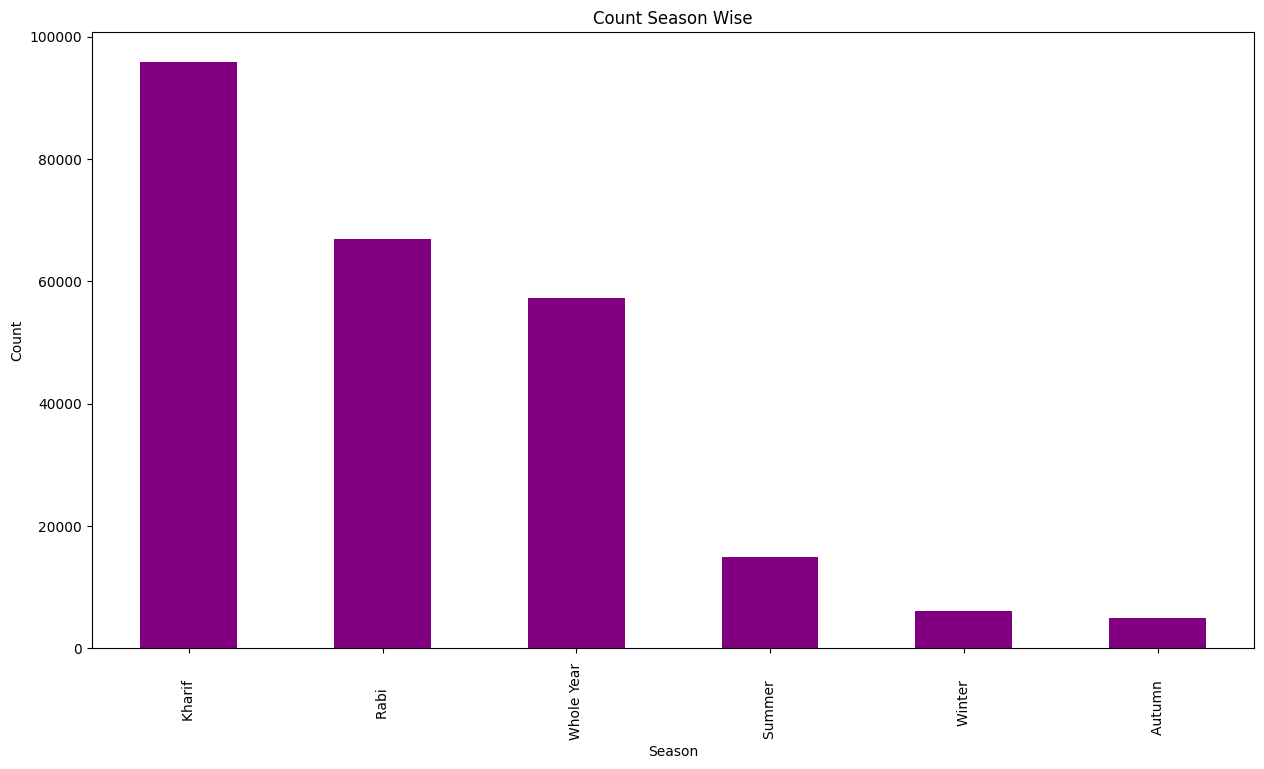

In [ ]:
# Season
# Plot the count of each state
# We used matplotlib 
# value coun calculates the count of each catagory
# Kind is praposed which plot we need to plot
# color is plot the color in graph
df_cat.Season.value_counts().plot(kind = "bar", color = "purple")

# Label the X axis
plt.xlabel("Season")

# Label the Y axis
plt.ylabel("Count")

# Give Title
plt.title("Count Season Wise")

# To draw the full graph we use plt.show()
plt.show()

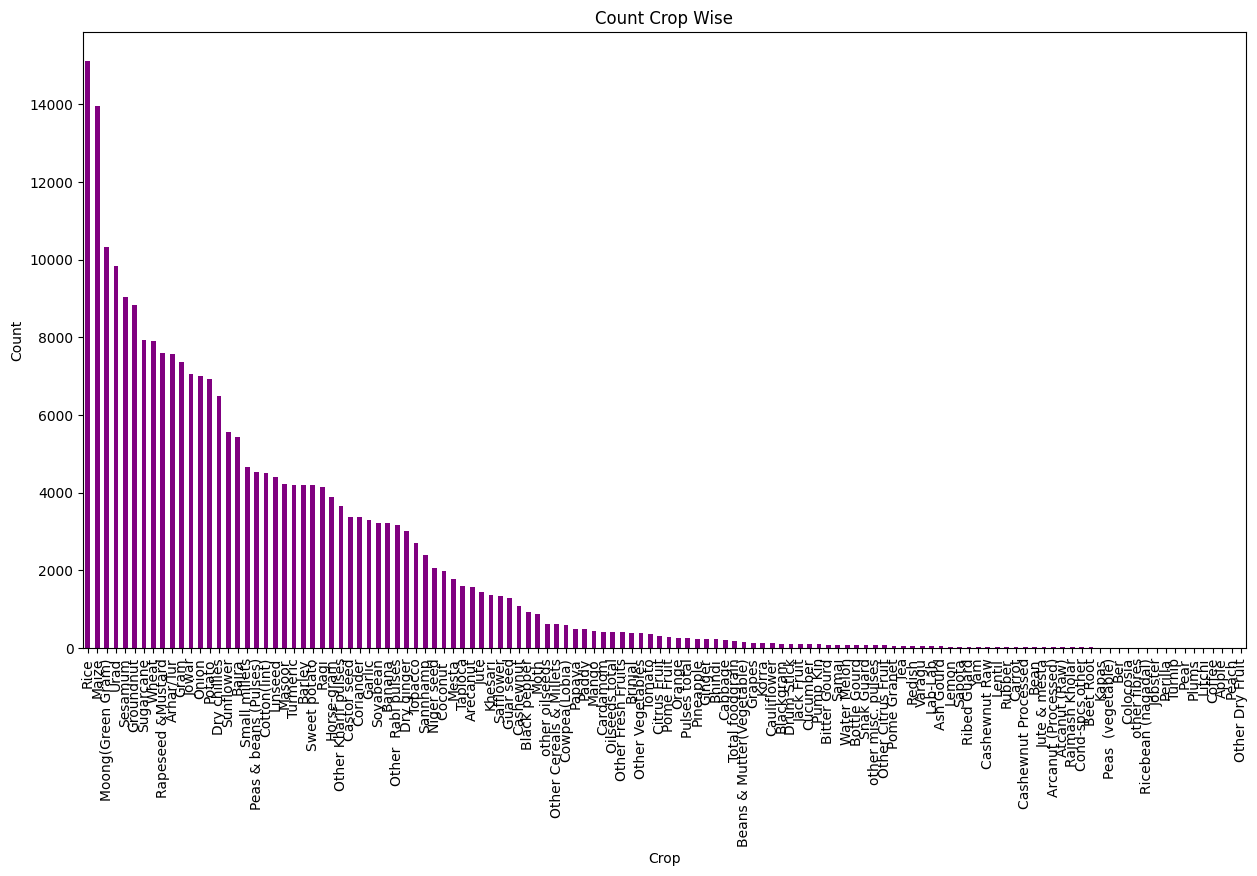

In [ ]:
# Crop
# Plot the count of each state
# We used matplotlib 
# value coun calculates the count of each catagory
# Kind is praposed which plot we need to plot
# color is plot the color in graph
df_cat.Crop.value_counts().plot(kind = "bar", color = "purple")

# Label the X axis
plt.xlabel("Crop")

# Label the Y axis
plt.ylabel("Count")

# Give Title
plt.title("Count Crop Wise")

# To draw the full graph we use plt.show()
plt.show()

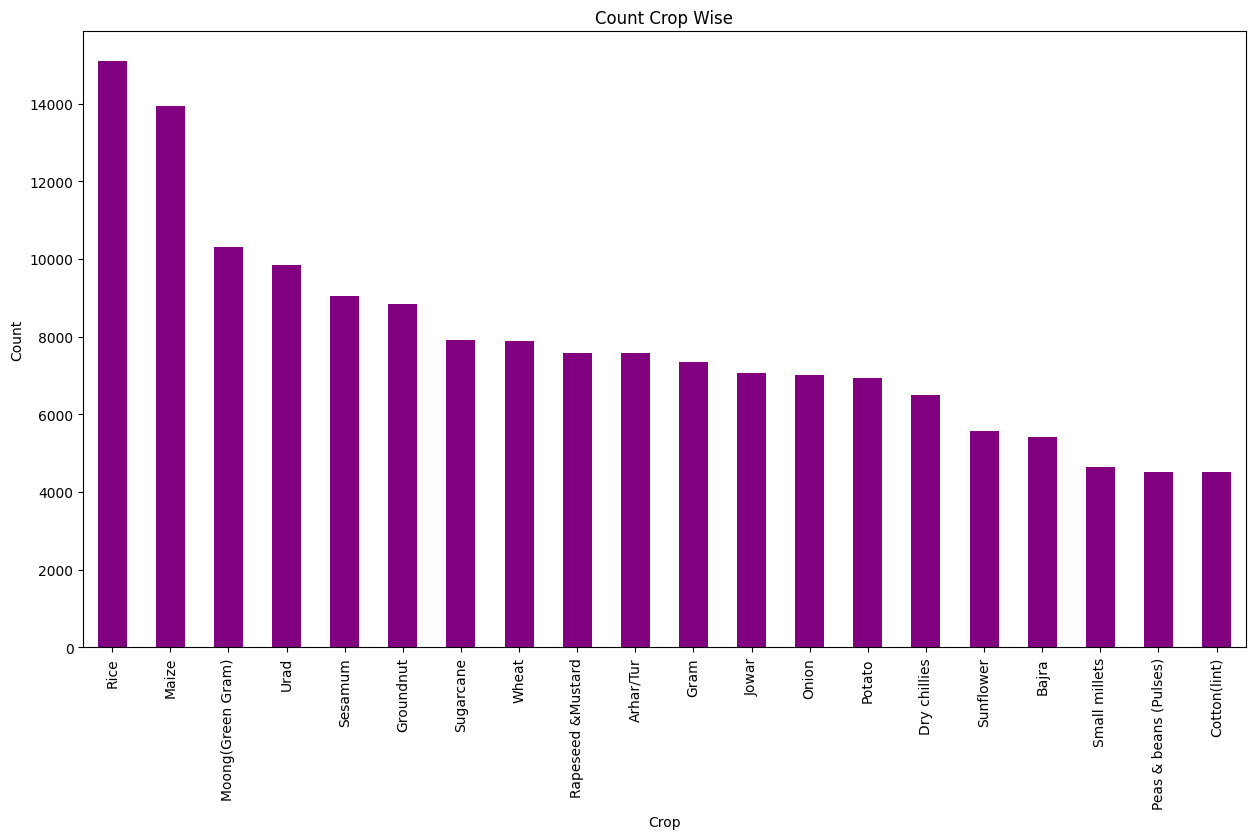

In [ ]:
# Crop
# Plot the count of each state
# We used matplotlib 
# value coun calculates the count of each catagory
# Kind is praposed which plot we need to plot
# color is plot the color in graph
df_cat.Crop.value_counts().head(20).plot(kind = "bar", color = "purple")

# Label the X axis
plt.xlabel("Crop")

# Label the Y axis
plt.ylabel("Count")

# Give Title
plt.title("Count Crop Wise")

# To draw the full graph we use plt.show()
plt.show()

### Interpretation

1.   All columns are in proper formate.
2.   `District_Name` contain very large disticnct values


### a. Numirical Data

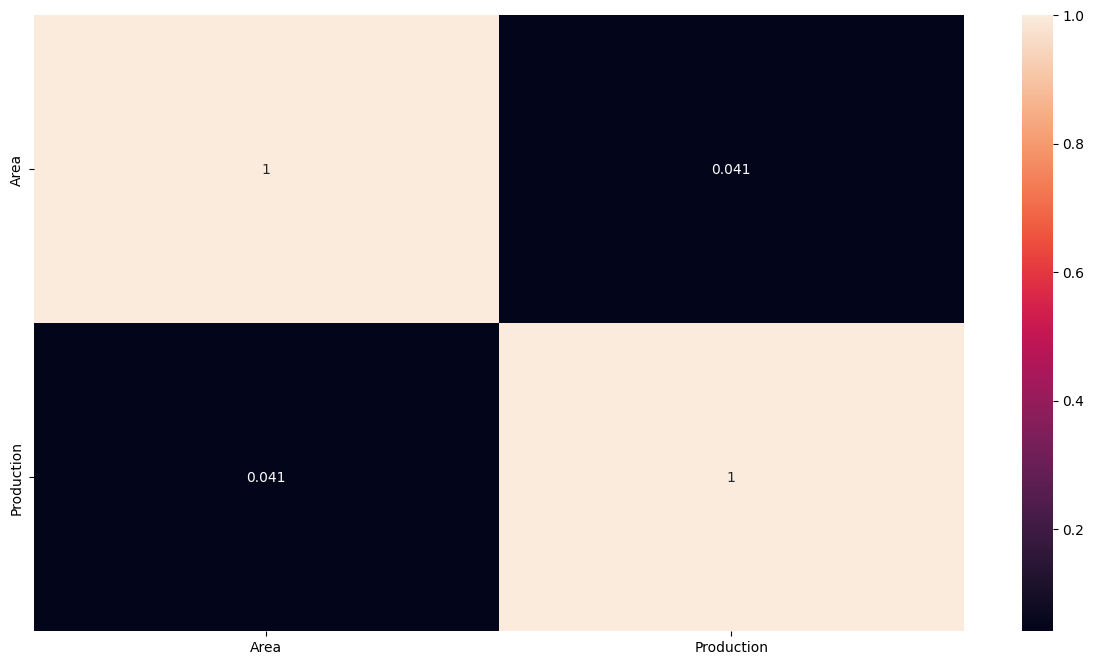

In [ ]:
sns.heatmap(df_crop_production.corr(),annot = True)
plt.show()

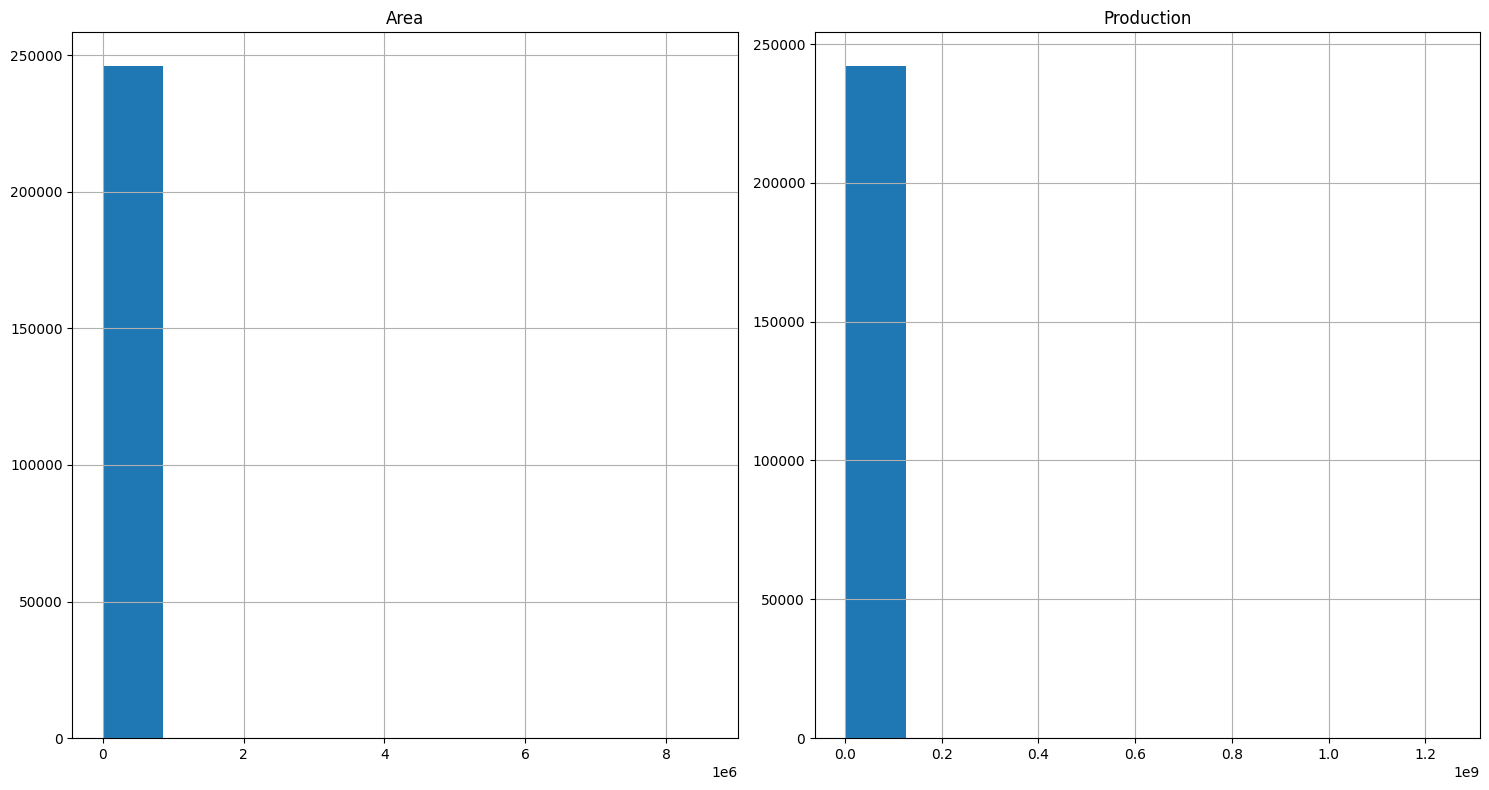

Skewness:


Crop_Year     0.009581
Area         48.001278
Production   40.741540
dtype: float64

In [ ]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_crop_production.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_crop_production.skew()

### Interpretation

1.   All Numirical columns are in proper formate.
2.   As we can see in the given diagram data is higly skewed also the skewness in is simmiler in both columns.


## 3. Null Value Handling

In [ ]:
df_crop_production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.000000,2000.000000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.000000,1.000000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.000000,321.000000
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.000000,641.000000
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.000000,165.000000


In [ ]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_crop_production.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_crop_production.isnull().sum()*100/df_crop_production.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Production,3730,1.515699
State_Name,0,0.000000
District_Name,0,0.000000
Crop_Year,0,0.000000
Season,0,0.000000
Crop,0,0.000000
Area,0,0.000000


### Interpretation

1.   only 1.5% data is missing in `Production` column.

In [ ]:
# Action
# Less then 2% Data is missing, also we have good amount of data so we can drop those null records
df_crop_production.dropna(inplace = True)

In [ ]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_crop_production.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_crop_production.isnull().sum()*100/df_crop_production.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
State_Name,0,0.000000
District_Name,0,0.000000
Crop_Year,0,0.000000
Season,0,0.000000
Crop,0,0.000000
Area,0,0.000000
Production,0,0.000000


In [ ]:
# First Check Catagorical Columns
df_cat = df_crop_production.select_dtypes(include=[np.object])
df_cat.head()

,State_Name,District_Name,Crop_Year,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut


## **4. Outlier Treatment**

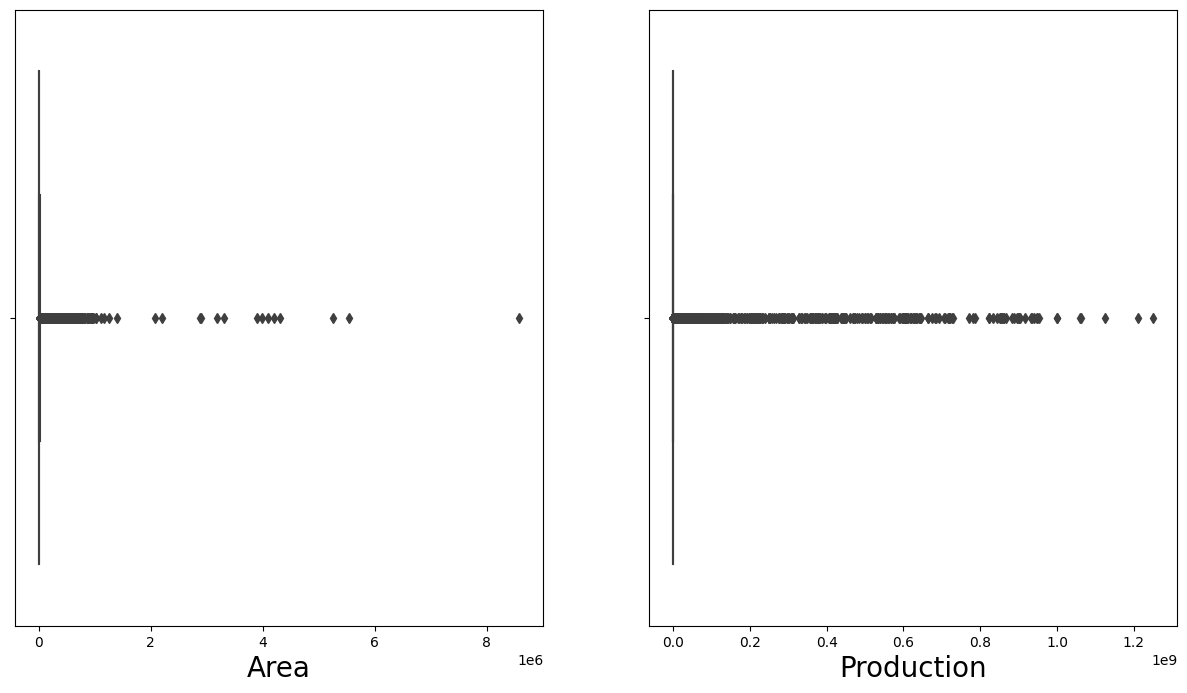

In [ ]:
df_num = df_crop_production.select_dtypes(include=[np.number])
# Now Check Numirical Veriables
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

# Interpretation


1.   Area and Production both columns contain the outliers, That we already observed.
2.   Production is our target veriable so we can not treat those.
3.   Even we cannot perform the outlier tratment on Area column, The reason is angriculteral in India is now that reach, also some time production wont be depands on the Area.




## 5. Dummy Encode the Categorical Variables

In [ ]:
# sapearte the target veriable
target = df_num.Production

In [ ]:
df_cat.head()

,State_Name,District_Name,Crop_Year,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut


In [ ]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)
dummy_var = dummy_var.reset_index()
dummy_var.head()

,index,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,District_Name_AHMEDNAGAR,District_Name_AIZAWL,District_Name_AJMER,District_Name_AKOLA,District_Name_ALAPPUZHA,District_Name_ALIGARH,District_Name_ALIRAJPUR,District_Name_ALLAHABAD,District_Name_ALMORA,District_Name_ALWAR,District_Name_AMBALA,District_Name_AMBEDKAR NAGAR,District_Name_AMETHI,District_Name_AMRAVATI,District_Name_AMRELI,District_Name_AMRITSAR,District_Name_AMROHA,District_Name_ANAND,District_Name_ANANTAPUR,District_Name_ANANTNAG,District_Name_ANJAW,District_Name_ANUGUL,District_Name_ANUPPUR,District_Name_ARARIA,District_Name_ARIYALUR,District_Name_ARWAL,District_Name_ASHOKNAGAR,District_Name_AURAIYA,District_Name_AURANGABAD,District_Name_AZAMGARH,District_Name_BADGAM,District_Name_BAGALKOT,District_Name_BAGESHWAR,District_Name_BAGHPAT,District_Name_BAHRAICH,District_Name_BAKSA,District_Name_BALAGHAT,District_Name_BALANGIR,District_Name_BALESHWAR,District_Name_BALLIA,District_Name_BALOD,District_Name_BALODA BAZAR,District_Name_BALRAMPUR,District_Name_BANAS KANTHA,District_Name_BANDA,District_Name_BANDIPORA,District_Name_BANGALORE RURAL,District_Name_BANKA,District_Name_BANKURA,District_Name_BANSWARA,District_Name_BARABANKI,District_Name_BARAMULLA,District_Name_BARAN,District_Name_BARDHAMAN,District_Name_BAREILLY,District_Name_BARGARH,District_Name_BARMER,District_Name_BARNALA,District_Name_BARPETA,District_Name_BARWANI,District_Name_BASTAR,District_Name_BASTI,District_Name_BATHINDA,District_Name_BEED,District_Name_BEGUSARAI,District_Name_BELGAUM,District_Name_BELLARY,District_Name_BEMETARA,District_Name_BENGALURU URBAN,District_Name_BETUL,District_Name_BHADRAK,District_Name_BHAGALPUR,District_Name_BHANDARA,District_Name_BHARATPUR,District_Name_BHARUCH,District_Name_BHAVNAGAR,District_Name_BHILWARA,District_Name_BHIND,District_Name_BHIWANI,District_Name_BHOJPUR,District_Name_BHOPAL,District_Name_BIDAR,District_Name_BIJAPUR,District_Name_BIJNOR,District_Name_BIKANER,District_Name_BILASPUR,District_Name_BIRBHUM,District_Name_BISHNUPUR,District_Name_BOKARO,District_Name_BONGAIGAON,District_Name_BOUDH,District_Name_BUDAUN,District_Name_BULANDSHAHR,District_Name_BULDHANA,District_Name_BUNDI,District_Name_BURHANPUR,District_Name_BUXAR,District_Name_CACHAR,District_Name_CHAMARAJANAGAR,District_Name_CHAMBA,District_Name_CHAMOLI,District_Name_CHAMPAWAT,District_Name_CHAMPHAI,District_Name_CHANDAULI,District_Name_CHANDEL,District_Name_CHANDIGARH,District_Name_CHANDRAPUR,District_Name_CHANGLANG,District_Name_CHATRA,District_Name_CHHATARPUR,District_Name_CHHINDWARA,District_Name_CHIKBALLAPUR,District_Name_CHIKMAGALUR,District_Name_CHIRANG,District_Name_CHITRADURGA,District_Name_CHITRAKOOT,District_Name_CHITTOOR,District_Name_CHITTORGARH,District_Name_CHURACHANDPUR,District_Name_CHURU,District_Name_COIMBATORE,District_Name_COOCHBEHAR,District_Name_CUDDALORE,District_Name_CUTTACK,District_Name_DADRA AND NAGAR HAVELI,District_Name_DAKSHIN KANNAD,District_Name_DAMOH,District_Name_DANG,District_Name_DANTEWADA,District_Name_DARBHANGA,District_Name_DARJEELING,District_Name_DARRANG,District_Name_DATIA,District_Name_DAUSA,District_Name_DAVANGERE,District_Name_DEHRADUN,District_Name_DEOGARH,District_Name_DEOGHAR,District_Nam

## 6. Scale the Data

In [ ]:
df_num = df_num.drop("Production",axis = 1)

In [ ]:
# initialize the standard scalar
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)
df_num_scaled = df_num_scaled.reset_index()
df_num_scaled.head()

,index,Area
0,0,-0.214589
1,1,-0.239207
2,2,-0.237240
3,3,-0.235785
4,4,-0.225089


In [ ]:
# Concat both the dataframes "dummy_var", "df_num_scaled"
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,index,Area,index,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,District_Name_AHMEDNAGAR,District_Name_AIZAWL,District_Name_AJMER,District_Name_AKOLA,District_Name_ALAPPUZHA,District_Name_ALIGARH,District_Name_ALIRAJPUR,District_Name_ALLAHABAD,District_Name_ALMORA,District_Name_ALWAR,District_Name_AMBALA,District_Name_AMBEDKAR NAGAR,District_Name_AMETHI,District_Name_AMRAVATI,District_Name_AMRELI,District_Name_AMRITSAR,District_Name_AMROHA,District_Name_ANAND,District_Name_ANANTAPUR,District_Name_ANANTNAG,District_Name_ANJAW,District_Name_ANUGUL,District_Name_ANUPPUR,District_Name_ARARIA,District_Name_ARIYALUR,District_Name_ARWAL,District_Name_ASHOKNAGAR,District_Name_AURAIYA,District_Name_AURANGABAD,District_Name_AZAMGARH,District_Name_BADGAM,District_Name_BAGALKOT,District_Name_BAGESHWAR,District_Name_BAGHPAT,District_Name_BAHRAICH,District_Name_BAKSA,District_Name_BALAGHAT,District_Name_BALANGIR,District_Name_BALESHWAR,District_Name_BALLIA,District_Name_BALOD,District_Name_BALODA BAZAR,District_Name_BALRAMPUR,District_Name_BANAS KANTHA,District_Name_BANDA,District_Name_BANDIPORA,District_Name_BANGALORE RURAL,District_Name_BANKA,District_Name_BANKURA,District_Name_BANSWARA,District_Name_BARABANKI,District_Name_BARAMULLA,District_Name_BARAN,District_Name_BARDHAMAN,District_Name_BAREILLY,District_Name_BARGARH,District_Name_BARMER,District_Name_BARNALA,District_Name_BARPETA,District_Name_BARWANI,District_Name_BASTAR,District_Name_BASTI,District_Name_BATHINDA,District_Name_BEED,District_Name_BEGUSARAI,District_Name_BELGAUM,District_Name_BELLARY,District_Name_BEMETARA,District_Name_BENGALURU URBAN,District_Name_BETUL,District_Name_BHADRAK,District_Name_BHAGALPUR,District_Name_BHANDARA,District_Name_BHARATPUR,District_Name_BHARUCH,District_Name_BHAVNAGAR,District_Name_BHILWARA,District_Name_BHIND,District_Name_BHIWANI,District_Name_BHOJPUR,District_Name_BHOPAL,District_Name_BIDAR,District_Name_BIJAPUR,District_Name_BIJNOR,District_Name_BIKANER,District_Name_BILASPUR,District_Name_BIRBHUM,District_Name_BISHNUPUR,District_Name_BOKARO,District_Name_BONGAIGAON,District_Name_BOUDH,District_Name_BUDAUN,District_Name_BULANDSHAHR,District_Name_BULDHANA,District_Name_BUNDI,District_Name_BURHANPUR,District_Name_BUXAR,District_Name_CACHAR,District_Name_CHAMARAJANAGAR,District_Name_CHAMBA,District_Name_CHAMOLI,District_Name_CHAMPAWAT,District_Name_CHAMPHAI,District_Name_CHANDAULI,District_Name_CHANDEL,District_Name_CHANDIGARH,District_Name_CHANDRAPUR,District_Name_CHANGLANG,District_Name_CHATRA,District_Name_CHHATARPUR,District_Name_CHHINDWARA,District_Name_CHIKBALLAPUR,District_Name_CHIKMAGALUR,District_Name_CHIRANG,District_Name_CHITRADURGA,District_Name_CHITRAKOOT,District_Name_CHITTOOR,District_Name_CHITTORGARH,District_Name_CHURACHANDPUR,District_Name_CHURU,District_Name_COIMBATORE,District_Name_COOCHBEHAR,District_Name_CUDDALORE,District_Name_CUTTACK,District_Name_DADRA AND NAGAR HAVELI,District_Name_DAKSHIN KANNAD,District_Name_DAMOH,District_Name_DANG,District_Name_DANTEWADA,District_Name_DARBHANGA,District_Name_DARJEELING,District_Name_DARRANG,District_Name_DATIA,District_Name_DAUSA,District_Name_DAVANGERE,District_Name_DEHRADUN,District_Name_DEOGARH,District_Name_DEOGHAR,D

In [ ]:
X.shape

(242361, 826)

In [ ]:
df_cat.shape

(242361, 5)

In [ ]:
df_num.shape

(242361, 1)

In [ ]:
target.shape

(242361,)

## 7. Train-Test Split

In [ ]:
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (193888, 827)
y_train (193888,)
X_test (48473, 827)
y_test (48473,)


# 8. Build a base Model (Linear Regression)

In [ ]:
# Import from sklearn
from sklearn.linear_model import LinearRegression

# Initilize the model
lr = LinearRegression()


In [ ]:
# Fit the model
model = lr.fit(X_train, y_train)

## **9. Evaluate the base model**

In [ ]:
# Predict for test data
lr_pred = model.predict(X_test)

In [ ]:
# Draw the mean absolute error
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,lr_pred))

MAE 1955444.6554463357


In [ ]:
# Draw the mean squared error
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,lr_pred))

MSE 236083788485744.78


In [ ]:
# Draw the root mean squared error
print("RMSE",np.sqrt(mean_squared_error(y_test,lr_pred)))

RMSE 15365018.336655013


In [ ]:
# Draw the r squered value
from sklearn.metrics import r2_score
r2 = r2_score(y_test,lr_pred)
print(r2)

0.13209251474314554


# 10. Cross Validation (Grid Search CV)

In [ ]:
# Applying grid search to find the best alpha value for the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 0.0001, max_iter = 10000)


parameters = [{'alpha':[0.00001, 0.001, 0.99, 0.1, 0.05, 0.005, 0.722, 1, 2]}]


grid = GridSearchCV(estimator = enet, param_grid=parameters, cv = 10)
grid.fit(X_train, y_train)

# Grid Search will see which alpha returns the highest R2 and lowest combination of RMSE.
# That will be the ideal alpha value returned by grid

In [ ]:
from sklearn.metrics import r2_score
enet = ElasticNet(alpha = 1e-05, max_iter = 10000)

pred = enet.fit(X_train, y_train).predict(X_train)
pred_test = enet.fit(X_train, y_train).predict(X_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

In [ ]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] =  df_crop_production.Production.copy()
result_linear.head()
# Plot The Result
result_linear.Predicted.plot(kind = "line",color = "g")
result_linear.Actual.plot(kind = "line",color = 'purple')
plt.legend()

plt.title("Predection VS Actual",fontsize = 20)

plt.show()

## 11. Lasso and Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV

lasso = Lasso(alpha = 0.5, normalize = True, max_iter = 100000)

pred = lasso.fit(X_train, y_train).predict(X_train)
pred_test = lasso.fit(X_train, y_train).predict(X_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

In [ ]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] =  df_crop_production.Production.copy()
result_linear.head()
# Plot The Result
result_linear.Predicted.plot(kind = "line",color = "g")
result_linear.Actual.plot(kind = "line",color = 'purple')
plt.legend()

plt.title("Predection VS Actual",fontsize = 20)

plt.show()

In [ ]:
parameters = [{'alpha' : [0.1, 2, 50, 0, 7,8,9,10,11]}]

grid = GridSearchCV(estimator = lasso, param_grid = parameters, cv = 10)

grid.fit(X_train, y_train)

print(grid.best_params_) # alpha = 0.1

In [ ]:
ridge = Ridge(alpha=0.001, normalize=True)
pred = ridge.fit(X_train, y_train).predict(X_train)
pred_test = ridge.fit(X_train, y_train).predict(X_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

In [ ]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] =  df_crop_production.Production.copy()
result_linear.head()
# Plot The Result
result_linear.Predicted.plot(kind = "line",color = "g")
result_linear.Actual.plot(kind = "line",color = 'purple')
plt.legend()

plt.title("Predection VS Actual",fontsize = 20)

plt.show()


In [ ]:
parameters = [{'alpha' : [0.1, 2, 50, 0, 7,8,9,10,11]}]

grid = GridSearchCV(estimator = ridge, param_grid = parameters, cv = 10)

grid.fit(X_train, y_train)

print(grid.best_params_) # alpha = 0.1

In [ ]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.9, normalize = True)

pred = enet.fit(X_train, y_train).predict(X_train)
pred_test = enet.fit(X_train, y_train).predict(X_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

In [ ]:
# Find at Which alpha is good fitted to our model
parameters = [{'alpha' : [0.1,0.5,1,1.5,2,2.5,3,3.5,4], 
              'l1_ratio' : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] }]

grid = GridSearchCV(estimator = enet, param_grid = parameters, cv = 10)

grid.fit(X_train, y_train)
print(grid.best_params_)

# 12. Result

In [ ]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] = df_crop_production.Production.copy()
result_linear.head()

In [ ]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] = df_crop_production.Production.copy()
result_linear.head()
# Plot The Result
result_linear.Predicted.plot(kind = "line",color = "g")
result_linear.Actual.plot(kind = "line",color = 'purple')
plt.legend()

plt.title("Predection VS Actual",fontsize = 20)

plt.show()

END